In [1]:
import pandas as pd

In [106]:
anime_synopsis=pd.read_csv('anime_with_synopsis.csv')

In [107]:
df=pd.DataFrame(anime_synopsis)
Score_type=df["Score"].dtype
Score_type # neden Object?

dtype('O')

In [109]:
df["Score"]

0           8.78
1           8.39
2           8.24
3           7.27
4           6.98
          ...   
16209    Unknown
16210    Unknown
16211    Unknown
16212    Unknown
16213    Unknown
Name: Score, Length: 16214, dtype: object

In [31]:
# Score sütununu işleme
def process_score(score):
    if score == 'Unknown':
        return None  # 'Unknown' ise None (boş) değer döndürme
    else:
        try:
            return float(score)  # String sayıyı float'a çevirme
        except ValueError:
            return None  # Geçersiz değer varsa yine None (boş) döndürme

# Score sütununu işlemeyi uygulama
anime_synopsis['Score'] = anime_synopsis['Score'].apply(process_score)

print(anime_synopsis)

       MAL_ID                             Name  Score  \
0           1                     Cowboy Bebop   8.78   
1           5  Cowboy Bebop: Tengoku no Tobira   8.39   
2           6                           Trigun   8.24   
3           7               Witch Hunter Robin   7.27   
4           8                   Bouken Ou Beet   6.98   
...       ...                              ...    ...   
16209   48481  Daomu Biji Zhi Qinling Shen Shu    NaN   
16210   48483                     Mieruko-chan    NaN   
16211   48488  Higurashi no Naku Koro ni Sotsu    NaN   
16212   48491      Yama no Susume: Next Summit    NaN   
16213   48492                    Scarlet Nexus    NaN   

                                                  Genres  \
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space   
1                  Action, Drama, Mystery, Sci-Fi, Space   
2      Action, Sci-Fi, Adventure, Comedy, Drama, Shounen   
3      Action, Mystery, Police, Supernatural, Drama, ...   
4              

In [38]:
top_10_anime = anime_synopsis.sort_values(by="Score", ascending=False).head(10)
print(top_10_anime)

       MAL_ID                                  Name  Score  \
3446     5114      Fullmetal Alchemist: Brotherhood   9.19   
14647   40028  Shingeki no Kyojin: The Final Season   9.17   
4953     9253                           Steins;Gate   9.11   
13720   38524    Shingeki no Kyojin Season 3 Part 2   9.10   
8879    28977                              Gintama°   9.10   
5660    11061                Hunter x Hunter (2011)   9.10   
5234     9969                              Gintama'   9.08   
723       820                  Ginga Eiyuu Densetsu   9.07   
6377    15417                   Gintama': Enchousen   9.04   
8854    28851                        Koe no Katachi   9.00   

                                                  Genres  \
3446   Action, Military, Adventure, Comedy, Drama, Ma...   
14647  Action, Military, Mystery, Super Power, Drama,...   
4953                                    Thriller, Sci-Fi   
13720  Action, Drama, Fantasy, Military, Mystery, Sho...   
8879   Action, Co

In [103]:
#Which genres you should consider?
import matplotlib.pyplot as plt

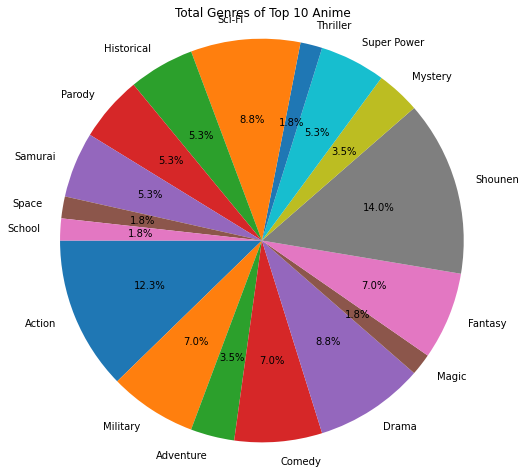

In [101]:
# Counting genres
sub_genres=[]
whole_genres=[]
for i in range(0,10):    
    first_anime_genres = top_10_anime.iloc[i]["Genres"]
    sub_genres=first_anime_genres.split(",")
    for j in range(0, len(sub_genres)):
        genre = sub_genres[j].strip()
        whole_genres.append(genre)
genre_counts = {}
for genre in whole_genres:
    genre_counts[genre] = genre_counts.get(genre, 0) + 1


# Preparing data for pie chart
labels = genre_counts.keys()
sizes = genre_counts.values()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
plt.title("Total Genres of Top 10 Anime")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

In [102]:
print(labels)

dict_keys(['Action', 'Military', 'Adventure', 'Comedy', 'Drama', 'Magic', 'Fantasy', 'Shounen', 'Mystery', 'Super Power', 'Thriller', 'Sci-Fi', 'Historical', 'Parody', 'Samurai', 'Space', 'School'])
